In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn import preprocessing
import datetime
movies = pd.read_csv('movies-1990-to-2017/Movie_Movies.csv') #Movies dataset with movies from 1900 to 2018
movies.head(5)

C:\Users\Jarvis\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Awards,Country,DVD,Director,Language,Plot,Poster,Production,Rated,Released,Runtime,Title,Type,Website,Year,imdbID,imdbRating,imdbVotes
0,NaN,USA,NaN,Rose Cummings,English,Rachel constantly hears her baby cry from the ...,NaN,NaN,NaN,26 Apr 2012,20 min,Baby's Breath,movie,NaN,2012,tt2268369,NaN,NaN
1,NaN,USA,NaN,James Byrne,NaN,The struggle against unfortunate circumstances...,NaN,NaN,NaN,NaN,9 min,Winter Trees,movie,NaN,2008,tt1560760,NaN,NaN
2,NaN,USA,NaN,Dimitri Buchowetzki,NaN,NaN,NaN,NaN,NaN,27 Mar 1926,50 min,The Crown of Lies,movie,NaN,1926,tt0016750,NaN,NaN
3,NaN,USA,NaN,Julia Hechler,English,"A Gift introduces Samuel Green, Washington Sta...",NaN,NaN,NaN,27 May 2013,2 min,A Gift,movie,NaN,2013,tt3405286,NaN,NaN
4,NaN,Sri Lanka,NaN,Udara Siriruwan,Sinhalese,NaN,NaN,NaN,NaN,20 Mar 2014,23 min,Journey,movie,NaN,2014,tt3816698,NaN,NaN


In [2]:
duplicate_movies = movies
movies.describe()

,imdbRating
count,62073.000000
mean,6.416236
std,1.360472
min,1.000000
25%,5.600000
50%,6.500000
75%,7.300000
max,10.000000


In [3]:
movies.dtypes

Awards         object
Country        object
DVD            object
Director       object
Language       object
Plot           object
Poster         object
Production     object
Rated          object
Released       object
Runtime        object
Title          object
Type           object
Website        object
Year           object
imdbID         object
imdbRating    float64
imdbVotes      object
dtype: object

In [4]:
movies['Released'] = movies['Released'].astype('datetime64[ns]') #change the 'Released' column to date data type
movies = movies[movies['Released'] > datetime.date(1989,12,31)] #only movies released after January 1990 will appear
movies.describe()

C:\Users\Jarvis\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  


,imdbRating
count,36712.000000
mean,6.478424
std,1.384554
min,1.000000
25%,5.700000
50%,6.600000
75%,7.400000
max,10.000000


In [5]:
movies['Award?']=np.where(movies['Awards'].isna(),0, 1)
del movies['Poster']
del movies['DVD']
del movies['Rated']
del movies['Type']
del movies['Website']
movies.head(5)

C:\Users\Jarvis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Awards,Country,Director,Language,Plot,Production,Released,Runtime,Title,Year,imdbID,imdbRating,imdbVotes,Award?
0,NaN,USA,Rose Cummings,English,Rachel constantly hears her baby cry from the ...,NaN,2012-04-26,20 min,Baby's Breath,2012,tt2268369,NaN,NaN,0
3,NaN,USA,Julia Hechler,English,"A Gift introduces Samuel Green, Washington Sta...",NaN,2013-05-27,2 min,A Gift,2013,tt3405286,NaN,NaN,0
4,NaN,Sri Lanka,Udara Siriruwan,Sinhalese,NaN,NaN,2014-03-20,23 min,Journey,2014,tt3816698,NaN,NaN,0
13,NaN,USA,NaN,English,NaN,NaN,2002-08-10,NaN,MAW: 10th Annual Summer Sizzler,2002,tt1615038,NaN,NaN,0
14,NaN,New Zealand,David Gunson,English,NaN,NaN,2015-02-14,7 min,Foreign Fields,2015,tt5191168,NaN,NaN,0


In [6]:
genres = pd.read_csv('movies-1990-to-2017/Movie_Genres.csv')
movies = pd.merge(movies,genres, on='imdbID') #Merge two CSV files
movies.head(5)

,Awards,Country,Director,Language,Plot,Production,Released,Runtime,Title,Year,imdbID,imdbRating,imdbVotes,Award?,Unnamed: 0,Genre
0,NaN,USA,Rose Cummings,English,Rachel constantly hears her baby cry from the ...,NaN,2012-04-26,20 min,Baby's Breath,2012,tt2268369,NaN,NaN,0,0,Short
1,NaN,USA,Rose Cummings,English,Rachel constantly hears her baby cry from the ...,NaN,2012-04-26,20 min,Baby's Breath,2012,tt2268369,NaN,NaN,0,1,Drama
2,NaN,USA,Julia Hechler,English,"A Gift introduces Samuel Green, Washington Sta...",NaN,2013-05-27,2 min,A Gift,2013,tt3405286,NaN,NaN,0,6,Documentary
3,NaN,USA,Julia Hechler,English,"A Gift introduces Samuel Green, Washington Sta...",NaN,2013-05-27,2 min,A Gift,2013,tt3405286,NaN,NaN,0,7,Short
4,NaN,Sri Lanka,Udara Siriruwan,Sinhalese,NaN,NaN,2014-03-20,23 min,Journey,2014,tt3816698,NaN,NaN,0,8,Short


In [7]:
movies = movies.drop_duplicates(subset = 'Title')
movies.head(5)

,Awards,Country,Director,Language,Plot,Production,Released,Runtime,Title,Year,imdbID,imdbRating,imdbVotes,Award?,Unnamed: 0,Genre
0,NaN,USA,Rose Cummings,English,Rachel constantly hears her baby cry from the ...,NaN,2012-04-26,20 min,Baby's Breath,2012,tt2268369,NaN,NaN,0,0,Short
2,NaN,USA,Julia Hechler,English,"A Gift introduces Samuel Green, Washington Sta...",NaN,2013-05-27,2 min,A Gift,2013,tt3405286,NaN,NaN,0,6,Documentary
4,NaN,Sri Lanka,Udara Siriruwan,Sinhalese,NaN,NaN,2014-03-20,23 min,Journey,2014,tt3816698,NaN,NaN,0,8,Short
6,NaN,USA,NaN,English,NaN,NaN,2002-08-10,NaN,MAW: 10th Annual Summer Sizzler,2002,tt1615038,NaN,NaN,0,26,Sport
7,NaN,New Zealand,David Gunson,English,NaN,NaN,2015-02-14,7 min,Foreign Fields,2015,tt5191168,NaN,NaN,0,27,Short


In [8]:
sub1 = 'h'
sub2 = ','
sub3 = '.'
movies['Runtime'] = movies['Runtime'].str.slice(0,-4) #remove last four characters from 'Runtime' column which has 'min' string
movies['Runtime_index1'] = movies['Runtime'].str.find(sub1)
movies['Runtime_index2'] = movies['Runtime'].str.find(sub2)
movies = movies.dropna(subset=['Runtime'])
movies.head(5)

,Awards,Country,Director,Language,Plot,Production,Released,Runtime,Title,Year,imdbID,imdbRating,imdbVotes,Award?,Unnamed: 0,Genre,Runtime_index1,Runtime_index2
0,NaN,USA,Rose Cummings,English,Rachel constantly hears her baby cry from the ...,NaN,2012-04-26,20,Baby's Breath,2012,tt2268369,NaN,NaN,0,0,Short,-1.0,-1.0
2,NaN,USA,Julia Hechler,English,"A Gift introduces Samuel Green, Washington Sta...",NaN,2013-05-27,2,A Gift,2013,tt3405286,NaN,NaN,0,6,Documentary,-1.0,-1.0
4,NaN,Sri Lanka,Udara Siriruwan,Sinhalese,NaN,NaN,2014-03-20,23,Journey,2014,tt3816698,NaN,NaN,0,8,Short,-1.0,-1.0
7,NaN,New Zealand,David Gunson,English,NaN,NaN,2015-02-14,7,Foreign Fields,2015,tt5191168,NaN,NaN,0,27,Short,-1.0,-1.0
8,1 win.,USA,Matt Hish,English,Tom and Brenda have the perfect life but when ...,Khoury A Marriot Productions,2014-02-01,97,Haunting of the Innocent,2014,tt2554714,2.4,345,1,28,Horror,-1.0,-1.0


In [9]:
movies['Runtime_index1'] = movies['Runtime_index1'].astype(int)
movies['Runtime_index2'] = movies['Runtime_index2'].astype(int)

In [10]:
movies = movies.drop(movies[movies['Runtime_index1'] != -1].index, axis=0)
movies = movies.drop(movies[movies['Runtime_index2'] != -1].index, axis=0)
movies.head(5)

,Awards,Country,Director,Language,Plot,Production,Released,Runtime,Title,Year,imdbID,imdbRating,imdbVotes,Award?,Unnamed: 0,Genre,Runtime_index1,Runtime_index2
0,NaN,USA,Rose Cummings,English,Rachel constantly hears her baby cry from the ...,NaN,2012-04-26,20,Baby's Breath,2012,tt2268369,NaN,NaN,0,0,Short,-1,-1
2,NaN,USA,Julia Hechler,English,"A Gift introduces Samuel Green, Washington Sta...",NaN,2013-05-27,2,A Gift,2013,tt3405286,NaN,NaN,0,6,Documentary,-1,-1
4,NaN,Sri Lanka,Udara Siriruwan,Sinhalese,NaN,NaN,2014-03-20,23,Journey,2014,tt3816698,NaN,NaN,0,8,Short,-1,-1
7,NaN,New Zealand,David Gunson,English,NaN,NaN,2015-02-14,7,Foreign Fields,2015,tt5191168,NaN,NaN,0,27,Short,-1,-1
8,1 win.,USA,Matt Hish,English,Tom and Brenda have the perfect life but when ...,Khoury A Marriot Productions,2014-02-01,97,Haunting of the Innocent,2014,tt2554714,2.4,345,1,28,Horror,-1,-1


In [11]:
movies['Runtime'].describe

<bound method NDFrame.describe of 0          20
2           2
4          23
7           7
8          97
11         93
13         27
15         75
18          3
20          3
25          6
27         18
29         82
30         15
32          5
35         25
37         81
38        126
40        120
41         90
42        110
44          5
46          4
49         96
50         29
56         86
58         59
59        108
61         12
63         10
         ... 
147473    111
147476    114
147479    133
147482     81
147484    100
147487    139
147488     91
147491    121
147495     98
147500    124
147502    101
147503    118
147506    157
147509    130
147512    148
147515    127
147518    105
147521    121
147524    112
147527    112
147530    102
147532    189
147535    126
147537     88
147539    138
147542    132
147545     84
147548    162
147553    102
147556    139
Name: Runtime, Length: 56421, dtype: object>

In [12]:
movies['Runtime'] = pd.to_numeric(movies['Runtime']).astype(float)
movies['imdbRating'] = pd.to_numeric(movies['imdbRating']).astype(float)
movies['imdbVotes'] = movies['imdbVotes'].fillna('0',inplace=True)
movies['Votes_index1'] = movies['imdbVotes'].str.replace(',','')
movies['imdbVotes'] = pd.to_numeric(movies['imdbVotes']).astype(float)
movies.dtypes

Awards                    object
Country                   object
Director                  object
Language                  object
Plot                      object
Production                object
Released          datetime64[ns]
Runtime                  float64
Title                     object
Year                      object
imdbID                    object
imdbRating               float64
imdbVotes                float64
Award?                     int32
Unnamed: 0                 int64
Genre                     object
Runtime_index1             int32
Runtime_index2             int32
Votes_index1              object
dtype: object

In [13]:
movies.head(5)

,Awards,Country,Director,Language,Plot,Production,Released,Runtime,Title,Year,imdbID,imdbRating,imdbVotes,Award?,Unnamed: 0,Genre,Runtime_index1,Runtime_index2,Votes_index1
0,NaN,USA,Rose Cummings,English,Rachel constantly hears her baby cry from the ...,NaN,2012-04-26,20.0,Baby's Breath,2012,tt2268369,NaN,NaN,0,0,Short,-1,-1,None
2,NaN,USA,Julia Hechler,English,"A Gift introduces Samuel Green, Washington Sta...",NaN,2013-05-27,2.0,A Gift,2013,tt3405286,NaN,NaN,0,6,Documentary,-1,-1,None
4,NaN,Sri Lanka,Udara Siriruwan,Sinhalese,NaN,NaN,2014-03-20,23.0,Journey,2014,tt3816698,NaN,NaN,0,8,Short,-1,-1,None
7,NaN,New Zealand,David Gunson,English,NaN,NaN,2015-02-14,7.0,Foreign Fields,2015,tt5191168,NaN,NaN,0,27,Short,-1,-1,None
8,1 win.,USA,Matt Hish,English,Tom and Brenda have the perfect life but when ...,Khoury A Marriot Productions,2014-02-01,97.0,Haunting of the Innocent,2014,tt2554714,2.4,NaN,1,28,Horror,-1,-1,None


In [14]:
rating = movies
rating.head(5)

,Awards,Country,Director,Language,Plot,Production,Released,Runtime,Title,Year,imdbID,imdbRating,imdbVotes,Award?,Unnamed: 0,Genre,Runtime_index1,Runtime_index2,Votes_index1
0,NaN,USA,Rose Cummings,English,Rachel constantly hears her baby cry from the ...,NaN,2012-04-26,20.0,Baby's Breath,2012,tt2268369,NaN,NaN,0,0,Short,-1,-1,None
2,NaN,USA,Julia Hechler,English,"A Gift introduces Samuel Green, Washington Sta...",NaN,2013-05-27,2.0,A Gift,2013,tt3405286,NaN,NaN,0,6,Documentary,-1,-1,None
4,NaN,Sri Lanka,Udara Siriruwan,Sinhalese,NaN,NaN,2014-03-20,23.0,Journey,2014,tt3816698,NaN,NaN,0,8,Short,-1,-1,None
7,NaN,New Zealand,David Gunson,English,NaN,NaN,2015-02-14,7.0,Foreign Fields,2015,tt5191168,NaN,NaN,0,27,Short,-1,-1,None
8,1 win.,USA,Matt Hish,English,Tom and Brenda have the perfect life but when ...,Khoury A Marriot Productions,2014-02-01,97.0,Haunting of the Innocent,2014,tt2554714,2.4,NaN,1,28,Horror,-1,-1,None


In [15]:
def value():
    val = input("Enter preferred choice:\n1. Award winning movie\n2. High rating (no awards)\n3. Award winning and high rating\n")

In [16]:
def new_language(df):
    new_df = \
    (df.set_index(df.columns.drop('Language',1).tolist())
     .Language.str.split(', ',expand=True)
     .stack()
     .reset_index()
     .rename(columns={0:'Language'})
     .loc[:,df.columns])
    return new_df  

Enter preferred movie type to choose a genre and language:
1. Award winning movie
2. Highest rated movies (no awards)
3. Award winning and high rating
2


C:\Users\Jarvis\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\Jarvis\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


AxesSubplot(0.125,0.125;0.775x0.755)
High Rated Movies (>10000 votes and >8.0 rating) by Top 10 Languages
Language
English     34273
Japanese     1266
French       1190
German        998
Spanish       942
Italian       459
Russian       339
Mandarin      304
Korean        260
Greek         242
dtype: int64


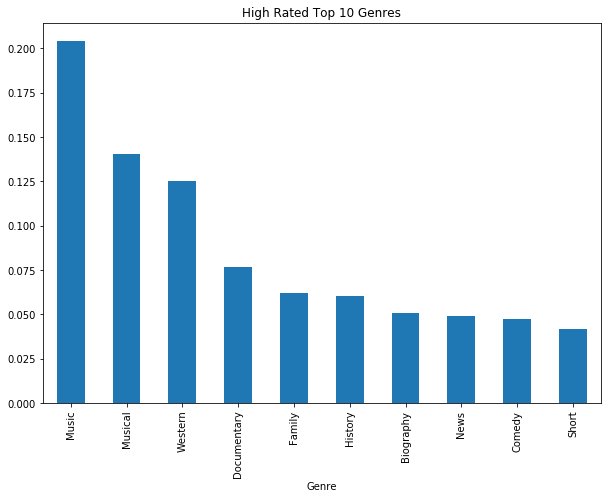

In [17]:
val1 = input("Enter preferred movie type to choose a genre and language:\n1. Award winning movie\n2. Highest rated movies (no awards)\n3. Award winning and high rating\n")

if val1 == '1':
    award_movies = movies[movies['Award?']==1]
    print(award_movies.groupby('Genre').size().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(10,7),title="Award Winning Top 10 Genres"))
    reshaped_award = new_language(award_movies)
    x=reshaped_award.groupby(['Language']).size().sort_values(ascending=False).head(10)
    print("Award Winning Movies by Top 10 Languages")
    print(x)

elif val1 == '2':
    rating = movies[movies['Award?']==0]
    rating['imdbVotes'] = rating['imdbVotes']>10000
    rating['imdbRating'] = rating['imdbRating'] > 8
    print(rating.groupby('Genre').mean()['imdbRating'].sort_values(ascending=False).head(10).plot(kind='bar',figsize=(10,7),title="High Rated Top 10 Genres"))
    reshaped_rated = new_language(rating)
    x=reshaped_rated.groupby(['Language']).size().sort_values(ascending=False).head(10)    
    print("High Rated Movies (>10000 votes and >8.0 rating) by Top 10 Languages")
    print(x)
          
elif val1 == '3':
    both = movies[movies['Award?']==1]
    both['imdbVotes'] = both['imdbVotes'] > 10000
    both['imdbRating'] = both['imdbRating'] > 8
    print(both.groupby('Genre').mean()['imdbRating'].sort_values(ascending=False).head(10).plot(kind='bar',figsize=(10,7),title="Award Winning & High Rated Top 10 Genres"))
    reshaped_both = new_language(both)
    x=reshaped_both.groupby(['Language']).size().sort_values(ascending=False).head(10)    
    print("Award Winning & High Rated Movies (>10000 votes and >8.0 rating) by Top 10 Languages")
    print(x)
          
else:
    print("Invalid entry. Please enter values 1,2 or 3")
    value()


In [18]:
val2 = input("Enter preferred genre:")

prob_award = movies[movies['Award?'] == 1]
prob_award['imdbRating'] = prob_award['imdbRating']<8
count_genre_award = prob_award.loc[prob_award['Genre']== val2].count()
probability1 = ((count_genre_award['Genre'])/(prob_award['Genre'].count()))*100
print("Probability of '%s' genre winning an award is %.0f%%"% (val2,probability1))

prob_rated = movies[movies['Award?'] == 0]
prob_rated['imdbVotes'] = prob_rated['imdbVotes']>10000
prob_rated['imdbRating'] = prob_rated['imdbRating']>8
count_genre_rated = prob_rated.loc[prob_rated['Genre']== val2].count()
prob_rated['Genre'].count()
probability2 = ((count_genre_rated['Genre'])/(prob_rated['Genre'].count()))*100
print("Probability of '%s' genre being rated above 8 without any award is %.0f%%"% (val2,round(probability2)))

prob_both = movies[movies['Award?'] == 0]
prob_both['imdbVotes'] = prob_both['imdbVotes']>10000
prob_both['imdbRating'] = prob_both['imdbRating']>8
count_genre_both = prob_both.loc[prob_both['Genre']== val2].count()
prob_both['Genre'].count()
probability3 = ((count_genre_both['Genre'])/(prob_both['Genre'].count()))*100
print("Probability of '%s' genre winning an award and being rated above 8 is %.0f%%"% (val2,round(probability3)))

Enter preferred genre:Music


C:\Users\Jarvis\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Jarvis\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Jarvis\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

Probability of 'Music' genre winning an award is 0%
Probability of 'Music' genre being rated above 8 without any award is 2%
Probability of 'Music' genre winning an award and being rated above 8 is 2%


C:\Users\Jarvis\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Jarvis\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [19]:
val3 = input("Enter preferred language:")

run_award = movies[movies['Award?'] == 1]
avg_run_award = run_award.loc[run_award['Language']== val3].mean()
avg_run_award = avg_run_award['Runtime'].mean()
print("Average runtime of award winning movie in '%s' language is %.0f minutes" % (val3,avg_run_award))

run_rated = movies[movies['Award?'] == 0]
run_rated['imdbVotes'] = run_rated['imdbVotes']>10000
run_rated['imdbRating'] = run_rated['imdbRating']>8
avg_run_rated = run_rated.loc[run_rated['Language']== val3].mean()
avg_run_rated = avg_run_rated['Runtime'].mean()
print("Average runtime of high rated (>8.0) movie with no awards in '%s' language is %.0f minutes" % (val3,avg_run_rated))

run_both = movies[movies['Award?'] == 0]
run_both['imdbVotes'] = run_both['imdbVotes']>10000
run_both['imdbRating'] = run_both['imdbRating']>8
avg_run_both = run_both.loc[run_both['Language']== val3].mean()
avg_run_both = avg_run_both['Runtime'].mean()
print("Average runtime of award winning high rated (>8.0) movie in '%s' language is %.0f minutes" % (val3,avg_run_both))

Enter preferred language:Hindi
Average runtime of award winning movie in 'Hindi' language is 129 minutes
Average runtime of high rated (>8.0) movie with no awards in 'Hindi' language is 89 minutes


C:\Users\Jarvis\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Jarvis\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Jarvis\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

Average runtime of award winning high rated (>8.0) movie in 'Hindi' language is 89 minutes


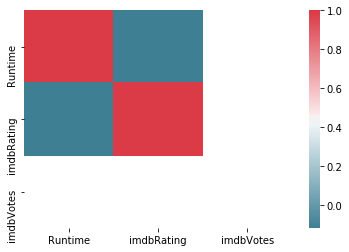

In [20]:
corr = movies.loc[:,movies.dtypes == 'float64'].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

C:\Users\Jarvis\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Jarvis\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


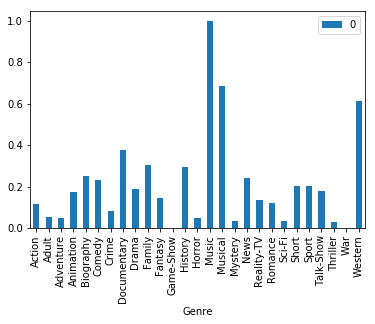

In [21]:
#normalize means to check if result remains same

norm_mean = movies[movies['Award?']==0]
norm_mean['imdbVotes'] = norm_mean['imdbVotes']>10000
norm_mean['imdbRating'] = norm_mean['imdbRating'] > 8
norm_mean = norm_mean.groupby('Genre').mean()['imdbRating']
norm_mean = pd.DataFrame(norm_mean)
scaler = preprocessing.MinMaxScaler()
norm_mean_scaled = scaler.fit_transform(norm_mean)
scaled_mean = pd.DataFrame(norm_mean_scaled)
scaled_mean.set_index(norm_mean.index).plot(kind='bar')

In [22]:
duplicate_movies.head(5)

,Awards,Country,DVD,Director,Language,Plot,Poster,Production,Rated,Released,Runtime,Title,Type,Website,Year,imdbID,imdbRating,imdbVotes
0,NaN,USA,NaN,Rose Cummings,English,Rachel constantly hears her baby cry from the ...,NaN,NaN,NaN,2012-04-26,20 min,Baby's Breath,movie,NaN,2012,tt2268369,NaN,NaN
1,NaN,USA,NaN,James Byrne,NaN,The struggle against unfortunate circumstances...,NaN,NaN,NaN,NaT,9 min,Winter Trees,movie,NaN,2008,tt1560760,NaN,NaN
2,NaN,USA,NaN,Dimitri Buchowetzki,NaN,NaN,NaN,NaN,NaN,1926-03-27,50 min,The Crown of Lies,movie,NaN,1926,tt0016750,NaN,NaN
3,NaN,USA,NaN,Julia Hechler,English,"A Gift introduces Samuel Green, Washington Sta...",NaN,NaN,NaN,2013-05-27,2 min,A Gift,movie,NaN,2013,tt3405286,NaN,NaN
4,NaN,Sri Lanka,NaN,Udara Siriruwan,Sinhalese,NaN,NaN,NaN,NaN,2014-03-20,23 min,Journey,movie,NaN,2014,tt3816698,NaN,NaN


In [23]:
duplicate_movies['imdbRating'] = pd.to_numeric(duplicate_movies['imdbRating']).astype(float)
duplicate_movies.dtypes

Awards                object
Country               object
DVD                   object
Director              object
Language              object
Plot                  object
Poster                object
Production            object
Rated                 object
Released      datetime64[ns]
Runtime               object
Title                 object
Type                  object
Website               object
Year                  object
imdbID                object
imdbRating           float64
imdbVotes             object
dtype: object

In [24]:
#null hypotheses: Population and selected sample are not different
#alternative hypotheses: Population and selected sample are different
stats.ttest_ind(movies['imdbRating'], duplicate_movies['imdbRating'], nan_policy='omit')

#Therefore, "Null" is rejected


Ttest_indResult(statistic=4.769165392041666, pvalue=1.8527636159006509e-06)

In [25]:
mean_1 = movies.dropna(subset=['imdbRating']).mean()['imdbRating']
mean_2 = duplicate_movies.dropna(subset=['imdbRating']).mean()['imdbRating']
print(mean_1,mean_2)

#Movies after 1990 were better rated compared to movies before 1990

6.462446544350956 6.41623572245576
